# Bayesian model evaluation

In [2]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import dill
import warnings
import arviz as az

In [3]:
# Import utility functions from the repository
from core.utils.visualization import (
    plot_observed_and_predicted_distributions,
    plot_calibration_and_residuals,
    plot_calibration_by_group,
    plot_residuals_by_group,
    print_evaluation_metrics_train,
    print_evaluation_metrics_crossval,
)
from core.utils import visualization_settings

In [4]:
# Load black for formatting
import jupyter_black

jupyter_black.load()

In [5]:
# Supress select warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="arviz")
az.rcParams["plot.max_subplots"] = 60

## Load data and extract variables

In [ ]:
# ALPHA DIVERSITY RUNS - 3 biome scope

# 1. Tot abundance, sqrt; 3-level slope; Gaussian; standard features
# Train: run_folder_2025-01-09_16.06.53 (5k tune, 1k draw, 1h 5min)

# 2. Tot abundance; 3-level slope; Beta; standard features
# Train: run_folder_2025-01-09_21.07.54  (5k tune, 1k draw, 1h 13min)

# 3. Tot abundance, no trans; 3-level slope; Gaussian; standard features
# Train: run_folder_2025-01-09_23.31.40 (5k tune, 1k draw, 1h 4min)
# Random CV: run_folder_2025-01-12_21.10 (1k tune, 500 draw)
# Spatial CV: run_folder_2025-01-12_23.40 (1k tune, 500 draw, 1h 8min)

# 4. Modified Shannon, no trans; 3-level slope; Gaussian; standard features
# Train: run_folder_2025-01-13_21.23.52 (1k tune, 500 draw, 16min)
# Random CV: run_folder_2025-01-13_23.12.17 (2k tune 1k draw, 2h 13min)

# ALPHA DIVERSITY RUNS - Global scope



# BETA DIVERSITY RUNS

In [19]:
# -- TRAINING -- data
training_path = "../../data/runs/run_folder_2025-01-13_21.23.52/training_output.pkl"
with open(training_path, "rb") as in_stream:
    training_output = dill.load(in_stream)

# -- RANDOM CV -- data
random_cv_path = "../../data/runs/run_folder_2025-01-13_23.12.17/cv_output.pkl"
with open(random_cv_path, "rb") as in_stream:
    random_cv_output = dill.load(in_stream)

# -- SPATIAL CV -- data
spatial_cv_path = "../../data/runs/run_folder_2025-01-12_23.40/cv_output.pkl"
with open(spatial_cv_path, "rb") as in_stream:
    spatial_cv_output = dill.load(in_stream)

# -- ENVIRONMENTAL CV -- data
# To be added

In [13]:
# TRAINING data variables

model_data_train = training_output["data"]
df_pred_train = training_output["state_predictions"]
state_metrics_train = training_output["state_metrics"]
df_pred_change_train = training_output["change_predictions"]
change_metrics_train = training_output["change_metrics"]
model_train = training_output["model"]
trace_train = training_output["trace"]
prior_predictive_train = training_output["prior_predictive"]

# Extract variables for analysis and plotting
y_true_train = df_pred_train.get_column("Observed").to_numpy()
y_pred_train = df_pred_train.get_column("Predicted").to_numpy()
y_res_train = df_pred_train.get_column("Residuals").to_numpy()

y_true_change_train = df_pred_change_train.get_column("Delta_observed").to_numpy()
y_pred_change_train = df_pred_change_train.get_column("Delta_predicted").to_numpy()
y_res_change_train = df_pred_change_train.get_column("Delta_residuals").to_numpy()

In [20]:
# RANDOM CV data variables

model_data_random_cv = random_cv_output["data"]
df_pred_random_cv = random_cv_output["state_predictions"]
state_metrics_random_cv = random_cv_output["state_metrics"]
df_pred_change_random_cv = random_cv_output["change_predictions"]
change_metrics_random_cv = random_cv_output["change_metrics"]
models_random_cv = random_cv_output["models"]
traces_random_cv = random_cv_output["traces"]

# Based on concatenated test folds
df_pred_all_random_cv = random_cv_output["all_test_results"]["state_predictions"]
state_metrics_all_random_cv = random_cv_output["all_test_results"]["state_metrics"]
df_pred_change_all_random_cv = random_cv_output["all_test_results"][
    "change_predictions"
]
change_metrics_all_random_cv = random_cv_output["all_test_results"]["change_metrics"]

# Extract variables for analysis and plotting
y_true_random_cv = df_pred_all_random_cv.get_column("Observed").to_numpy()
y_pred_random_cv = df_pred_all_random_cv.get_column("Predicted").to_numpy()
y_res_random_cv = df_pred_all_random_cv.get_column("Residuals").to_numpy()

y_true_change_random_cv = df_pred_change_all_random_cv.get_column(
    "Delta_observed"
).to_numpy()
y_pred_change_random_cv = df_pred_change_all_random_cv.get_column(
    "Delta_predicted"
).to_numpy()
y_res_change_random_cv = df_pred_change_all_random_cv.get_column(
    "Delta_residuals"
).to_numpy()

test_coords_random_cv = [coords["test"] for coords in cv_data]
level_1_idx_random_cv = np.concatenate(
    [coords["level_1_idx"] for coords in test_coords_random_cv]
)
level_2_idx_random_cv = np.concatenate(
    [coords["level_2_idx"] for coords in test_coords_random_cv]
)
level_3_idx_random_cv = np.concatenate(
    [coords["level_3_idx"] for coords in test_coords_random_cv]
)

NameError: name 'cv_data' is not defined

In [19]:
# SPATIAL CV data variables

model_data_spatial_cv = spatial_cv_output["data"]
df_pred_spatial_cv = spatial_cv_output["state_predictions"]
state_metrics_spatial_cv = spatial_cv_output["state_metrics"]
df_pred_change_spatial_cv = spatial_cv_output["change_predictions"]
change_metrics_spatial_cv = spatial_cv_output["change_metrics"]
models_spatial_cv = spatial_cv_output["models"]
traces_spatial_cv = spatial_cv_output["traces"]

# Based on concatenated test folds
df_pred_all_spatial_cv = spatial_cv_output["all_test_results"]["state_predictions"]
state_metrics_all_spatial_cv = spatial_cv_output["all_test_results"]["state_metrics"]
df_pred_change_all_spatial_cv = spatial_cv_output["all_test_results"][
    "change_predictions"
]
change_metrics_all_spatial_cv = spatial_cv_output["all_test_results"]["change_metrics"]

# Extract variables for analysis and plotting
y_true_spatial_cv = df_pred_all_spatial_cv.get_column("Observed").to_numpy()
y_pred_spatial_cv = df_pred_all_spatial_cv.get_column("Predicted").to_numpy()
y_res_spatial_cv = df_pred_all_spatial_cv.get_column("Residuals").to_numpy()

y_true_change_spatial_cv = df_pred_change_all_spatial_cv.get_column(
    "Delta_observed"
).to_numpy()
y_pred_change_spatial_cv = df_pred_change_all_spatial_cv.get_column(
    "Delta_predicted"
).to_numpy()
y_res_change_spatial_cv = df_pred_change_all_spatial_cv.get_column(
    "Delta_residuals"
).to_numpy()

test_coords_spatial_cv = [coords["test"] for coords in cv_data]
level_1_idx_spatial_cv = np.concatenate(
    [coords["level_1_idx"] for coords in test_coords_spatial_cv]
)
level_2_idx_spatial_cv = np.concatenate(
    [coords["level_2_idx"] for coords in test_coords_spatial_cv]
)
level_3_idx_spatial_cv = np.concatenate(
    [coords["level_3_idx"] for coords in test_coords_spatial_cv]
)

In [13]:
# Create mapping dictionaries for grouping variables and covariates
level_1_mapping = {
    code: name for code, name in enumerate(train_data["coords"]["level_1_values"])
}
level_2_mapping = {
    code: name for code, name in enumerate(train_data["coords"]["level_2_values"])
}
level_3_mapping = {
    code: name for code, name in enumerate(train_data["coords"]["level_3_values"])
}
variable_mapping = {
    code: var for code, var in enumerate(train_data["coords"]["x_vars"])
}

## --- Training data evaluation ---

### Training: Distribution of observed and predicted values

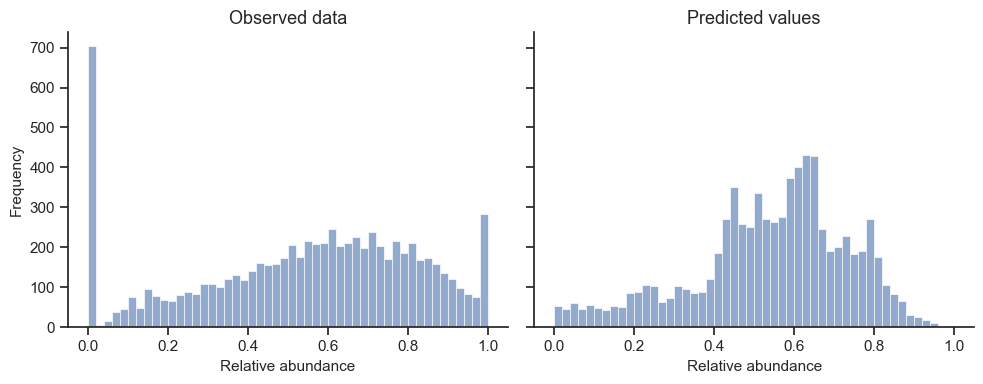

In [14]:
plot_observed_and_predicted_distributions(y_true=y_true_train, y_pred=y_pred_train)

### Training: Summary performance metrics

In [15]:
print_evaluation_metrics_train(state_metrics_train)

Model performance metrics
Overall metrics:
  - R² (standard def): 0.537
  - R² (variance explained): 0.509
  - Mean absolute error: 0.149
  - Median absolute error: 0.121
  - Pearson correlation: 0.734
  - Spearman correlation: 0.698
  - Bias ratio: 1.000

Bottom quartile metrics:
  - R² (standard def): -2.588
  - R² (variance explained): 0.588
  - Mean absolute error: 0.201
  - Median absolute error: 0.186
  - Pearson correlation: 0.566
  - Spearman correlation: 0.571
  - Bias ratio: 2.338

Top quartile metrics:
  - R² (standard def): -8.157
  - R² (variance explained): 0.469
  - Mean absolute error: 0.184
  - Median absolute error: 0.164
  - Pearson correlation: 0.166
  - Spearman correlation: 0.193
  - Bias ratio: 0.795



### Training: Calibration and residual plots

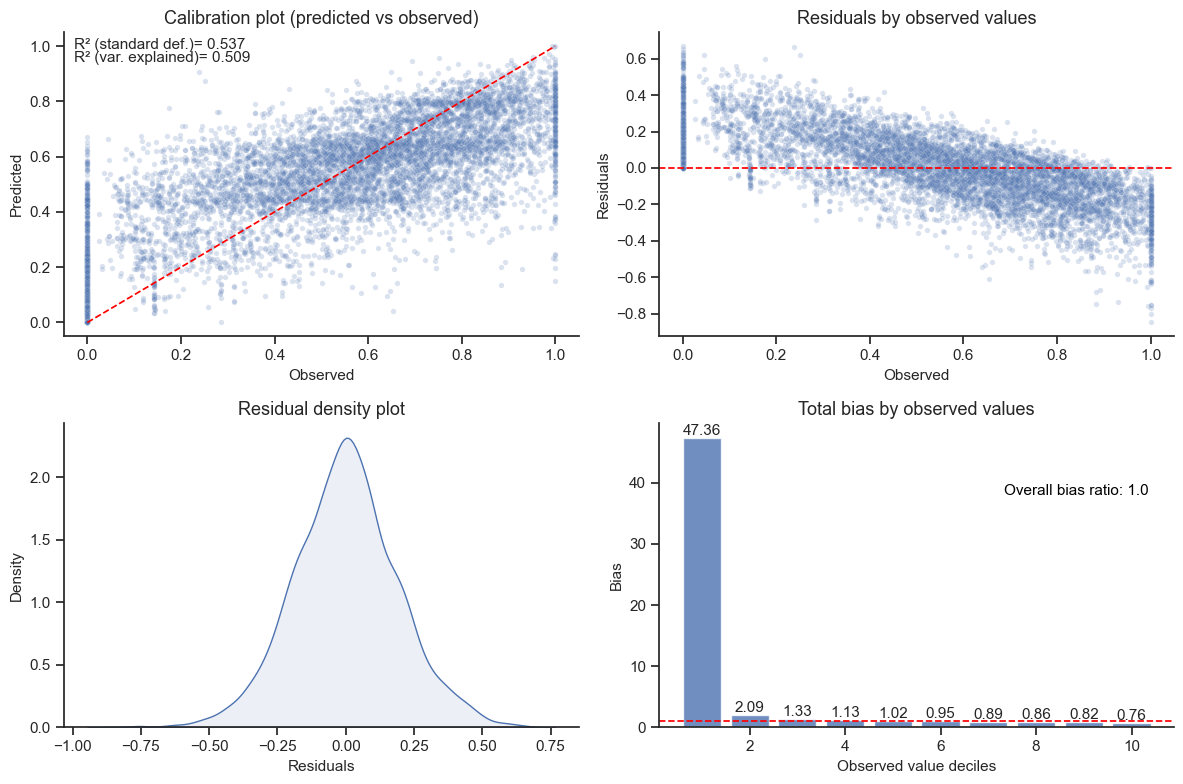

In [16]:
plot_calibration_and_residuals(
    y_true=y_true_train,
    y_pred=y_pred_train,
    y_residual=y_res_train,
    metrics=state_metrics_train,
)

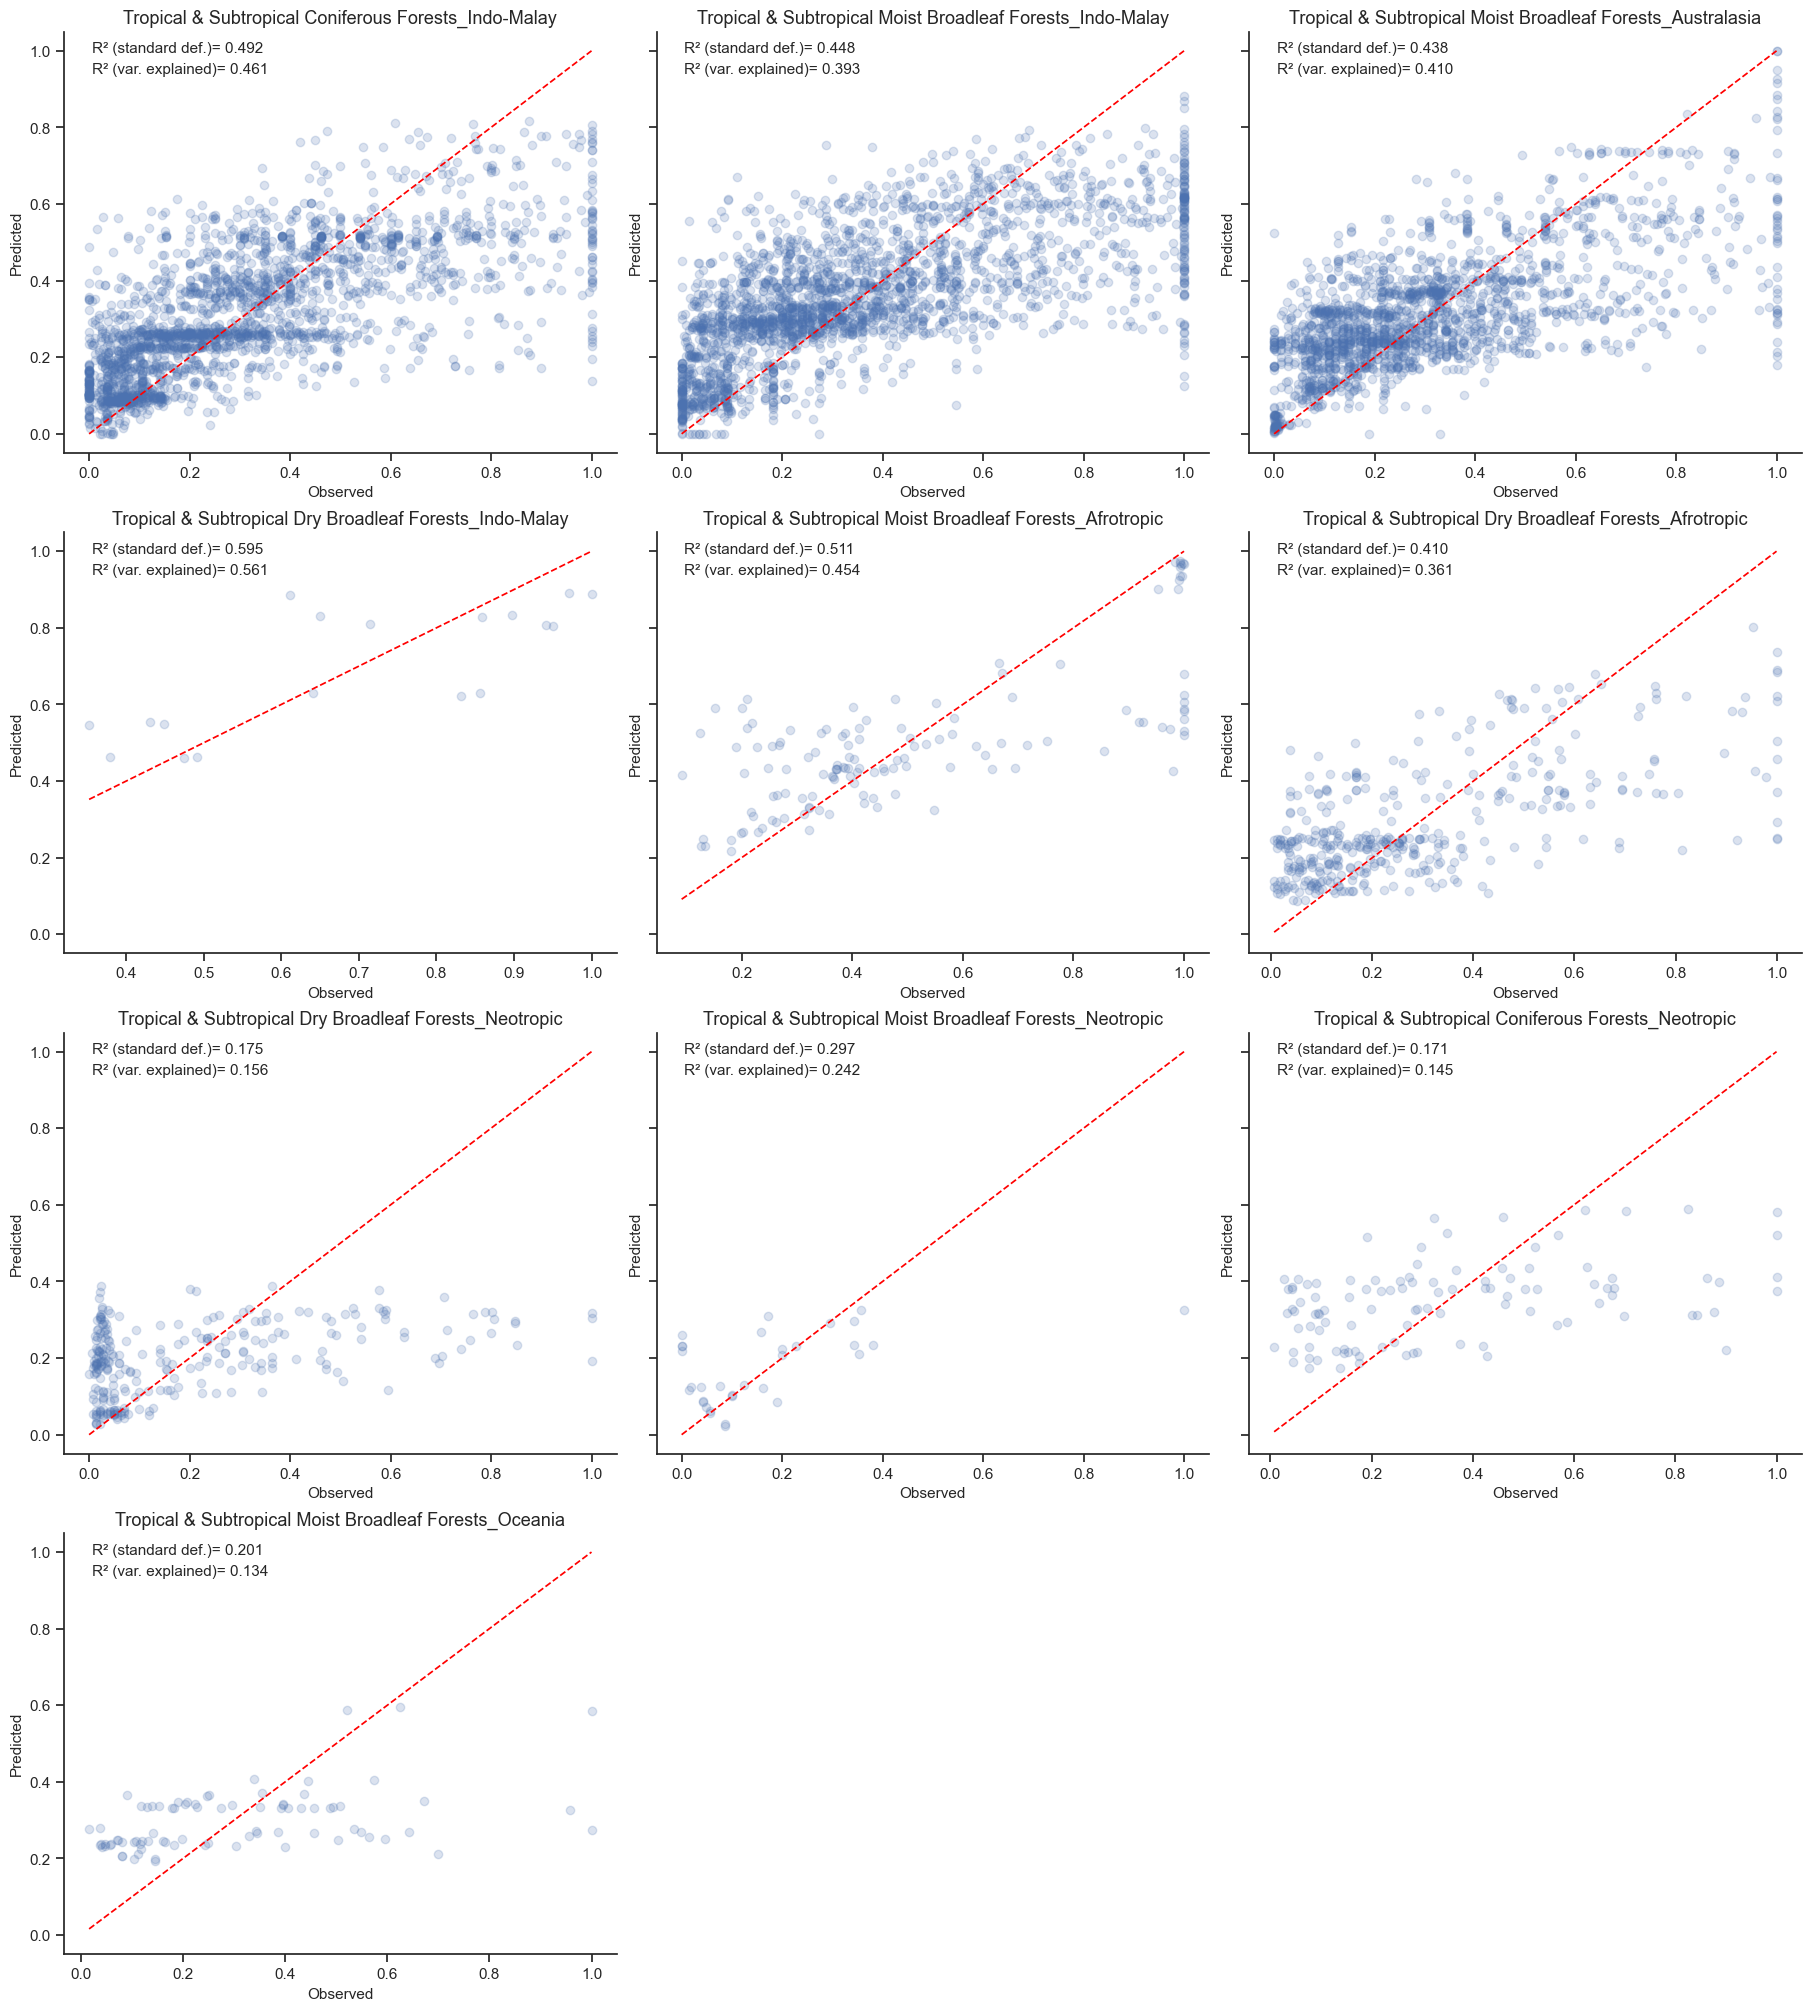

In [24]:
# Calibration plots by group
# Groups represent levels in the model hierarchy (from 1 up to 3)
plot_calibration_by_group(
    y_true=y_true_train,
    y_pred=y_pred_train,
    group_idx=train_data["level_2_idx"],
    group_mapping=level_2_mapping,
)

### Training: Approximation of change predictions

In [17]:
print_evaluation_metrics_train(change_metrics_train)

Model performance metrics
Overall metrics:
  - R² (standard def): 0.220
  - R² (variance explained): 0.205
  - Mean absolute error: 0.192
  - Median absolute error: 0.144
  - Pearson correlation: 0.470
  - Spearman correlation: 0.461
  - Bias ratio: 0.418

Bottom quartile metrics:
  - R² (standard def): -2.989
  - R² (variance explained): 0.301
  - Mean absolute error: 0.286
  - Median absolute error: 0.260
  - Pearson correlation: 0.279
  - Spearman correlation: 0.260
  - Bias ratio: 0.219

Top quartile metrics:
  - R² (standard def): -2.758
  - R² (variance explained): 0.274
  - Mean absolute error: 0.270
  - Median absolute error: 0.242
  - Pearson correlation: 0.199
  - Spearman correlation: 0.176
  - Bias ratio: 0.216



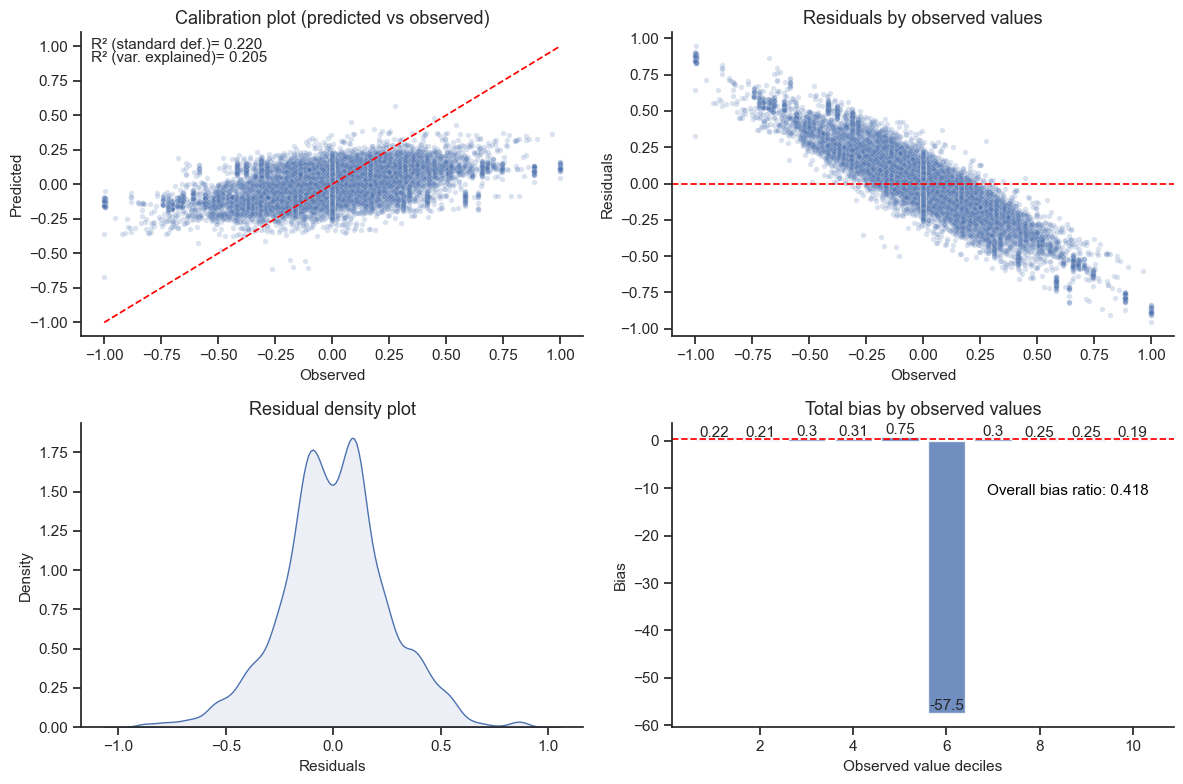

In [18]:
plot_calibration_and_residuals(
    y_true=y_true_change_train,
    y_pred=y_pred_change_train,
    y_residual=y_res_change_train,
    metrics=change_metrics_train,
)

## --- Random cross-validation evaluation ---

### Random CV: Summary performance metrics

In [21]:
print_evaluation_metrics_crossval(metrics=state_metrics_random_cv)

Cross-validation performance metrics
Overall metrics
--------------------------------------------------------------------------------
  - R² (standard def.):
   Test:  mean: 0.460 | min: 0.440 | max: 0.487
   Train: mean: 0.536 | min: 0.531 | max: 0.543
  - R² (variance explained):
   Test:  mean: 0.465 | min: 0.446 | max: 0.477
   Train: mean: 0.503 | min: 0.498 | max: 0.510
  - Mean absolute error:
   Test:  mean: 0.161 | min: 0.158 | max: 0.166
   Train: mean: 0.150 | min: 0.148 | max: 0.151
  - Median absolute error:
   Test:  mean: 0.131 | min: 0.128 | max: 0.138
   Train: mean: 0.122 | min: 0.121 | max: 0.123
  - Pearson correlation:
   Test:  mean: 0.679 | min: 0.664 | max: 0.698
   Train: mean: 0.734 | min: 0.730 | max: 0.738
  - Spearman correlation:
   Test:  mean: 0.639 | min: 0.619 | max: 0.657
   Train: mean: 0.699 | min: 0.696 | max: 0.701
  - Bias ratio:
   Test:  mean: 0.999 | min: 0.990 | max: 1.013
   Train: mean: 1.000 | min: 1.000 | max: 1.000

Bottom quartile metri

### Random CV: Calibration and residual plots

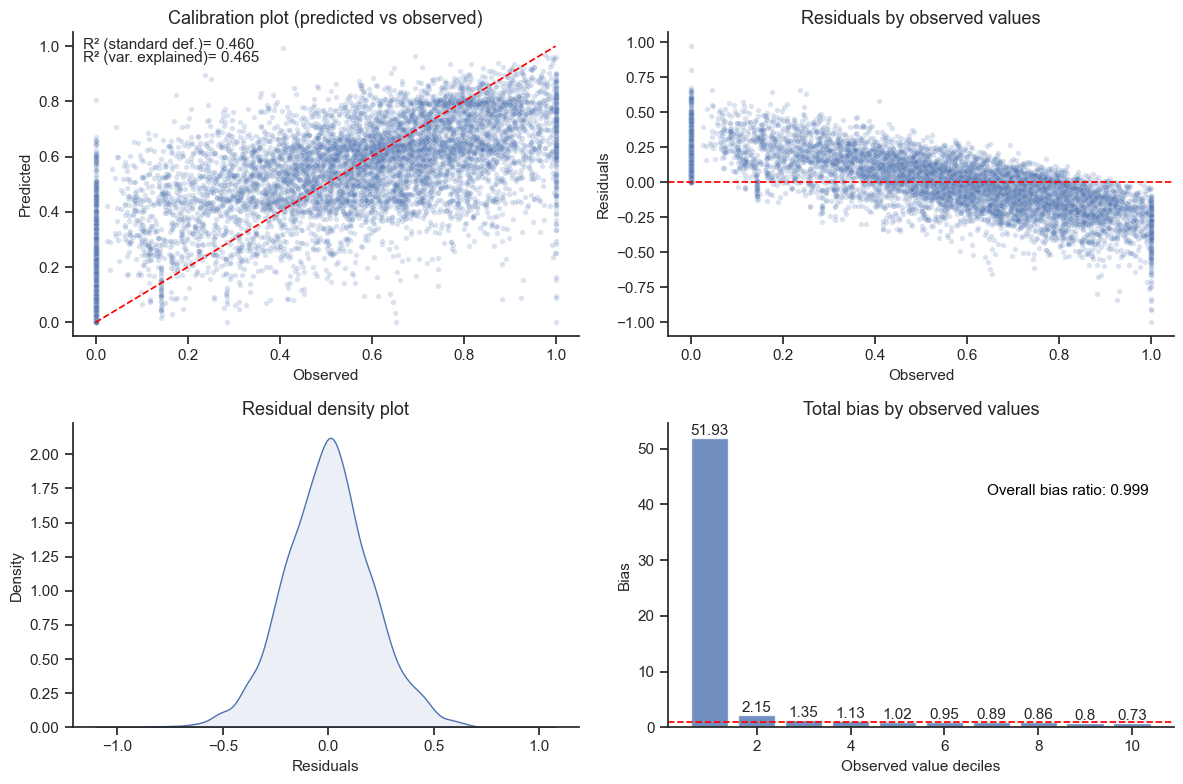

In [22]:
plot_calibration_and_residuals(
    y_true=y_true_random_cv,
    y_pred=y_pred_random_cv,
    y_residual=y_res_random_cv,
    metrics=state_metrics_all_random_cv,
)

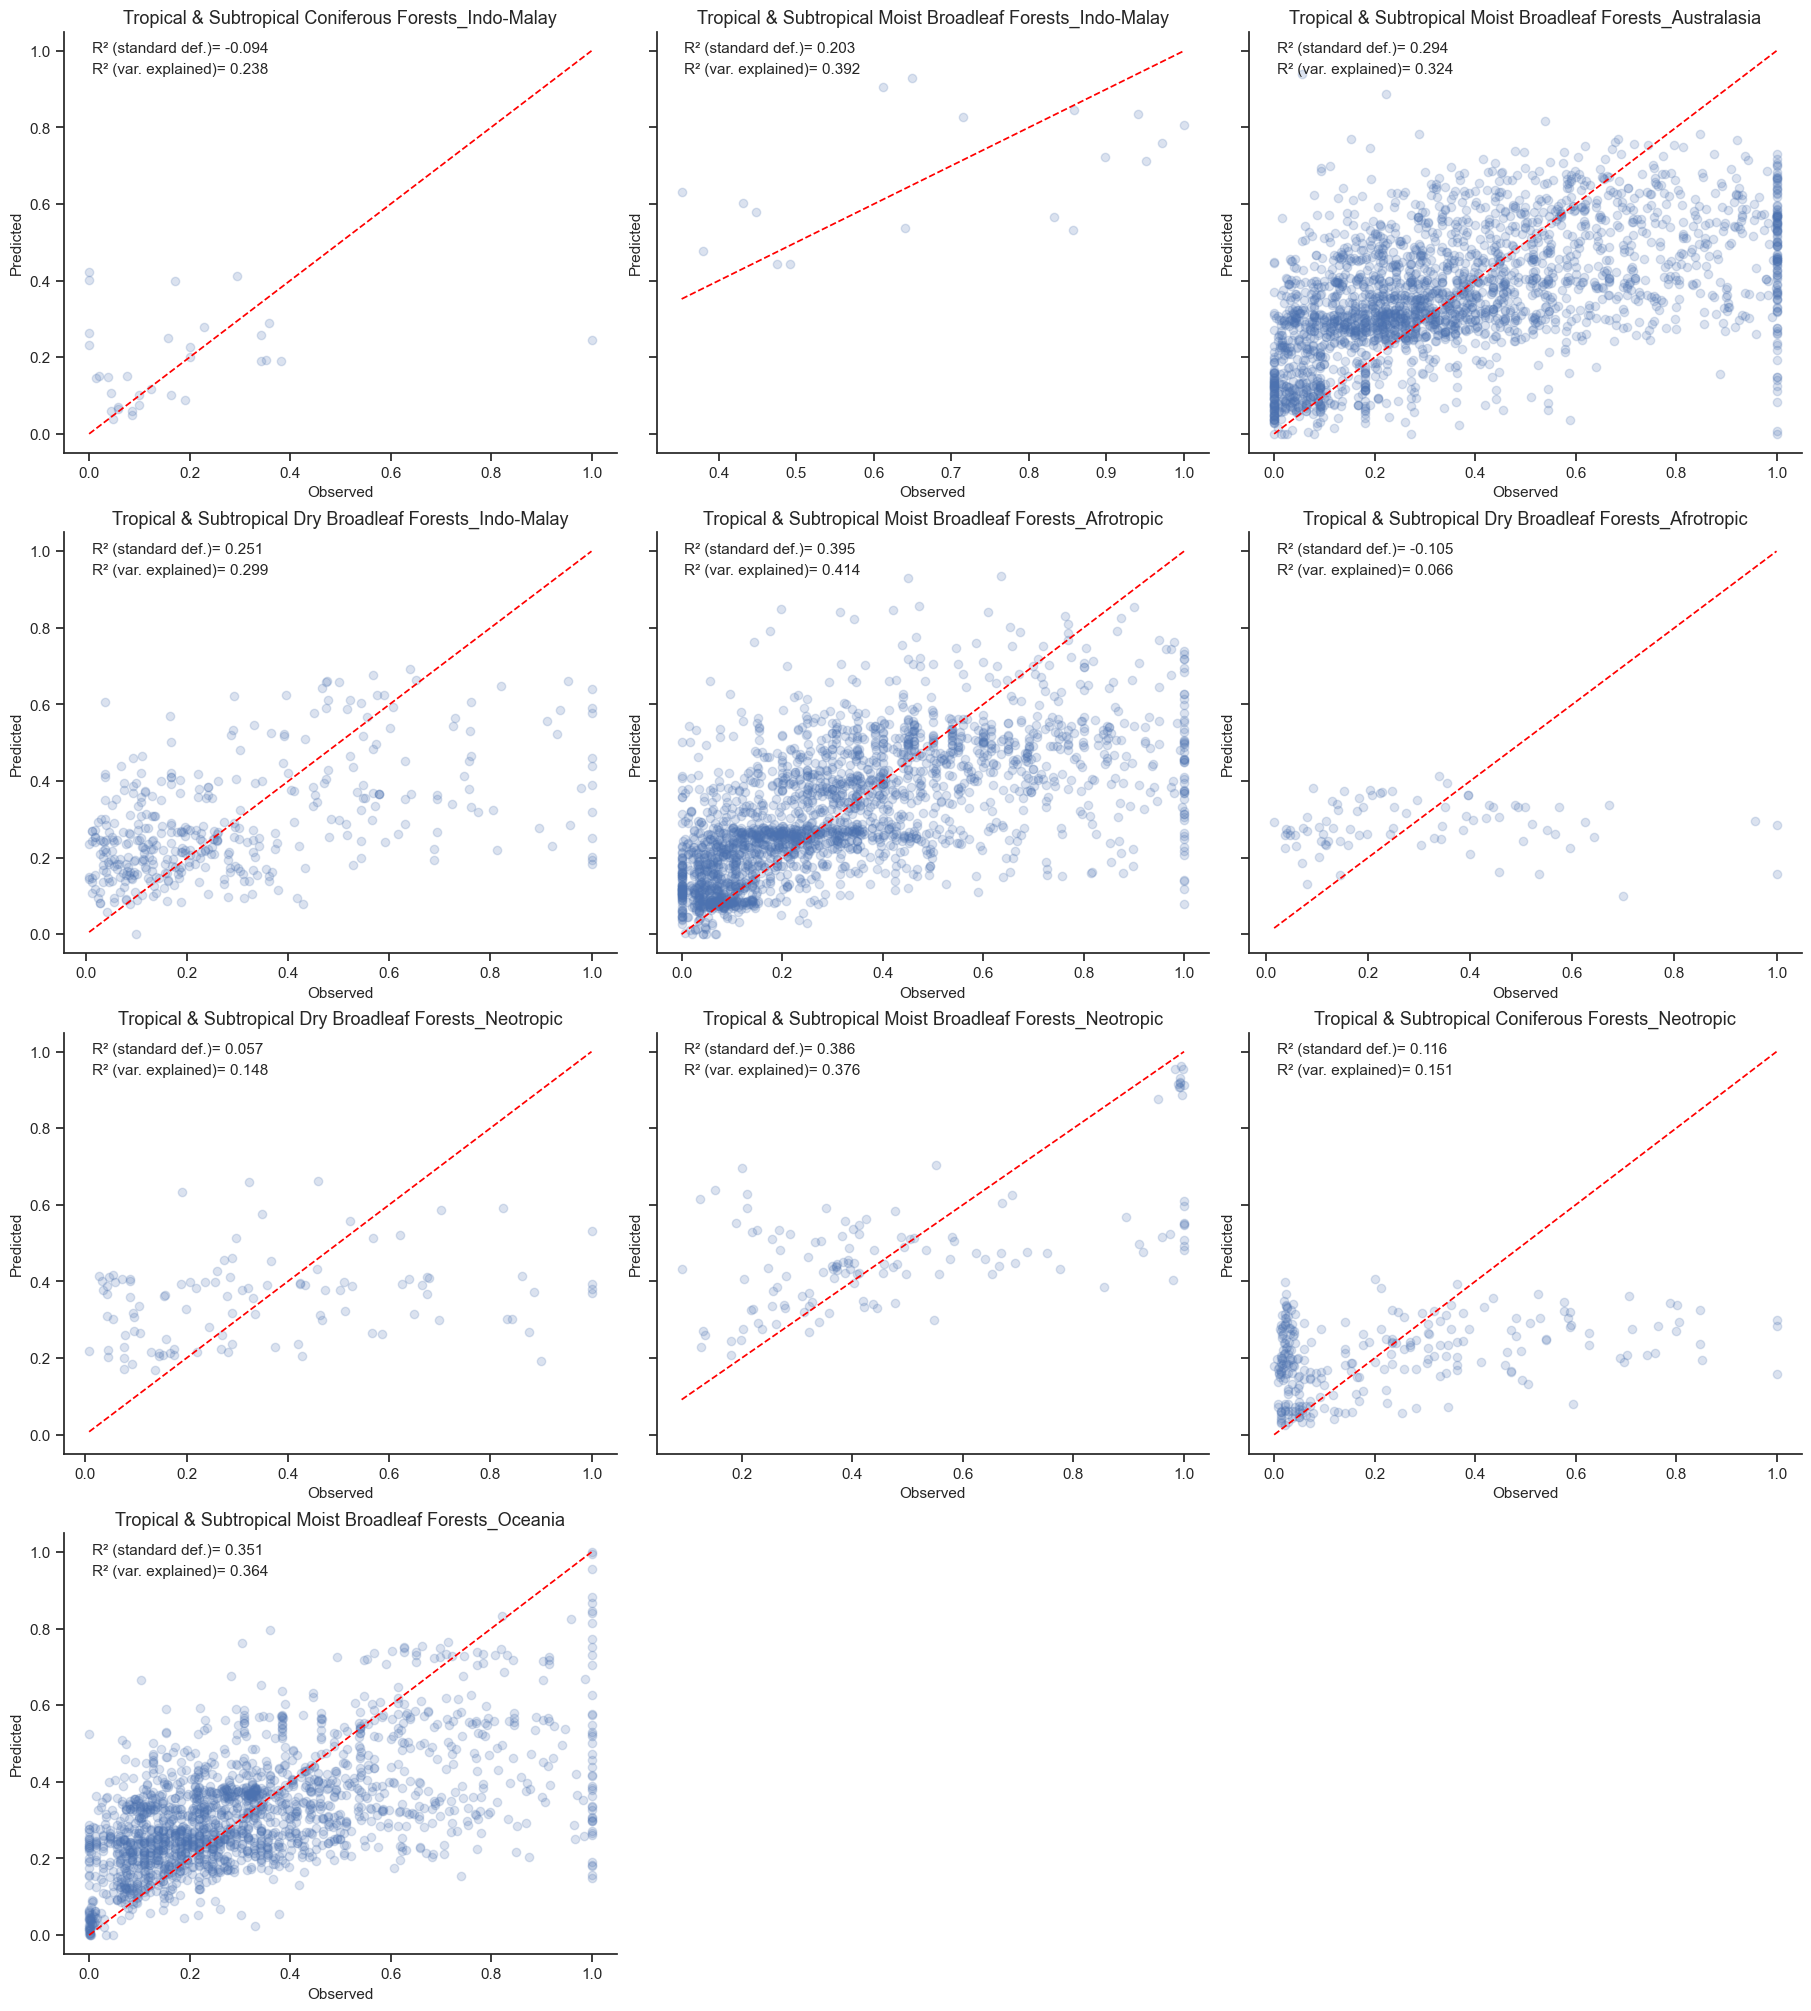

In [31]:
# Calibration plots by group
# Groups represent levels in the model hierarchy (from 1 up to 3)
plot_calibration_by_group(
    y_true=y_true_random_cv,
    y_pred=y_pred_random_cv,
    group_idx=level_2_idx_random_cv,
    group_mapping=level_2_mapping,
)

### Random CV: Approximation of change predictions

In [38]:
print_evaluation_metrics_crossval(metrics=change_metrics_random_cv)

Cross-validation performance metrics
Overall metrics
--------------------------------------------------------------------------------
  - R² (standard def.):
   Test:  mean: 0.241 | min: 0.106 | max: 0.378
   Train: mean: 0.316 | min: 0.302 | max: 0.328
  - R² (variance explained):
   Test:  mean: 0.262 | min: 0.149 | max: 0.388
   Train: mean: 0.254 | min: 0.244 | max: 0.264
  - Mean absolute error:
   Test:  mean: 0.141 | min: 0.120 | max: 0.168
   Train: mean: 0.136 | min: 0.131 | max: 0.140
  - Median absolute error:
   Test:  mean: 0.095 | min: 0.089 | max: 0.102
   Train: mean: 0.095 | min: 0.091 | max: 0.099
  - Pearson correlation:
   Test:  mean: 0.491 | min: 0.332 | max: 0.630
   Train: mean: 0.570 | min: 0.555 | max: 0.581
  - Spearman correlation:
   Test:  mean: 0.430 | min: 0.238 | max: 0.563
   Train: mean: 0.512 | min: 0.476 | max: 0.543
  - Bias ratio:
   Test:  mean: 0.017 | min: -1.221 | max: 1.217
   Train: mean: 0.445 | min: -0.271 | max: 1.632

Bottom quartile met

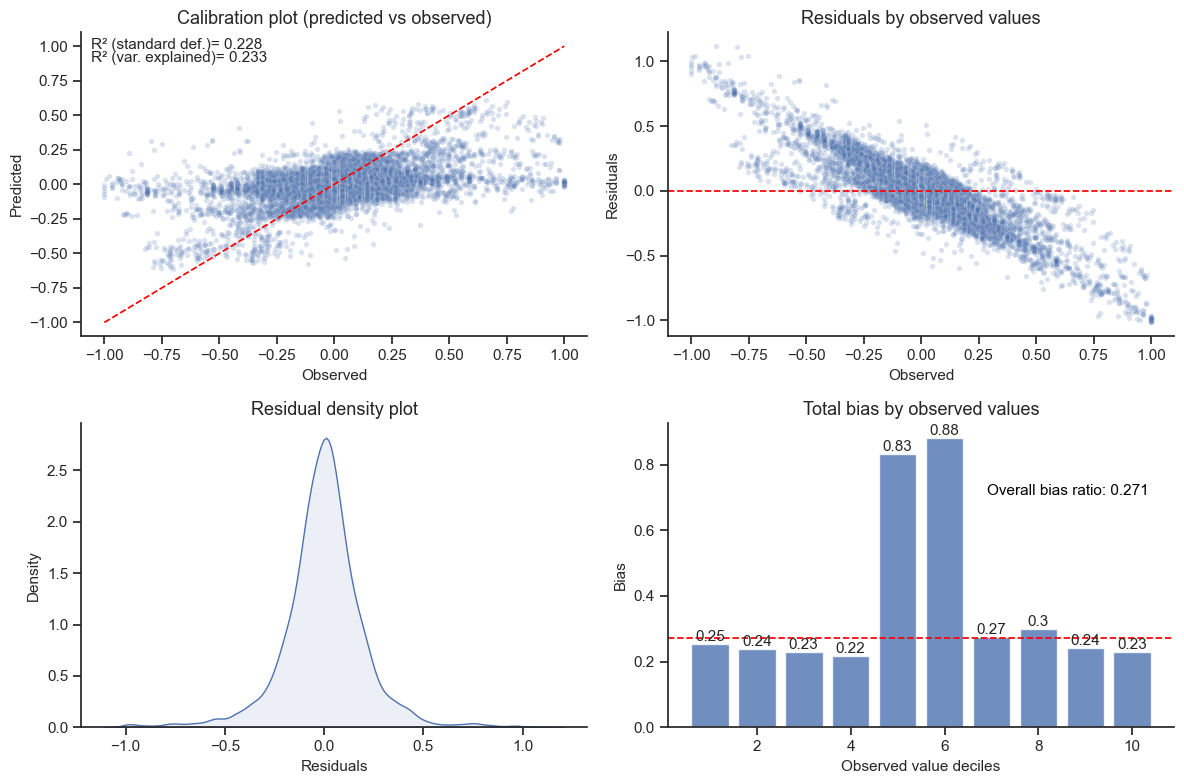

In [33]:
plot_calibration_and_residuals(
    y_true=y_true_change_random_cv,
    y_pred=y_pred_change_random_cv,
    y_residual=y_res_change_random_cv,
    metrics=change_metrics_all_random_cv,
)

## --- Spatial cross-validation evaluation ---

### Spatial CV: Summary performance metrics

In [34]:
print_evaluation_metrics_crossval(metrics=state_metrics_spatial_cv)

Cross-validation performance metrics
Overall metrics
--------------------------------------------------------------------------------
  - R² (standard def.):
   Test:  mean: -0.022 | min: -0.154 | max: 0.094
   Train: mean: 0.472 | min: 0.452 | max: 0.489
  - R² (variance explained):
   Test:  mean: 0.289 | min: 0.265 | max: 0.308
   Train: mean: 0.430 | min: 0.410 | max: 0.447
  - Mean absolute error:
   Test:  mean: 0.203 | min: 0.185 | max: 0.244
   Train: mean: 0.141 | min: 0.138 | max: 0.145
  - Median absolute error:
   Test:  mean: 0.163 | min: 0.143 | max: 0.203
   Train: mean: 0.107 | min: 0.104 | max: 0.111
  - Pearson correlation:
   Test:  mean: 0.318 | min: 0.241 | max: 0.376
   Train: mean: 0.690 | min: 0.675 | max: 0.702
  - Spearman correlation:
   Test:  mean: 0.335 | min: 0.280 | max: 0.408
   Train: mean: 0.700 | min: 0.676 | max: 0.718
  - Bias ratio:
   Test:  mean: 1.067 | min: 0.964 | max: 1.143
   Train: mean: 1.000 | min: 1.000 | max: 1.001

Bottom quartile met

### Spatial CV: Calibration and residual plots

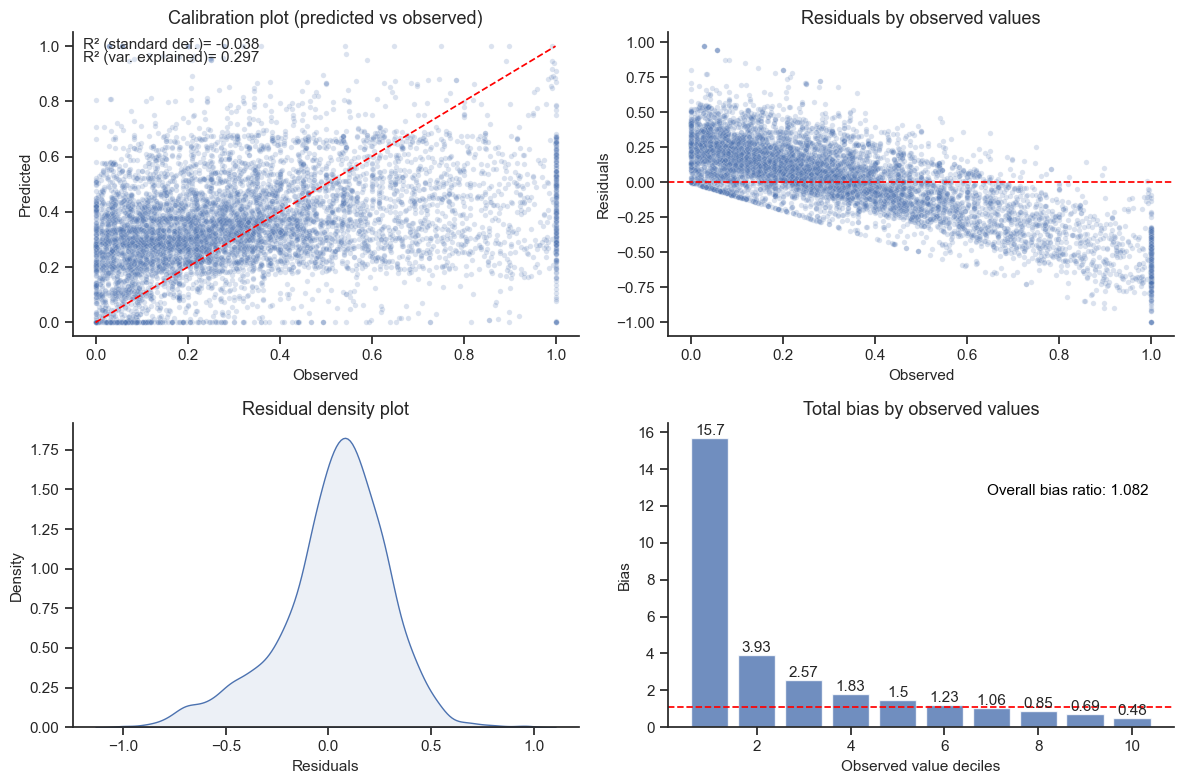

In [35]:
plot_calibration_and_residuals(
    y_true=y_true_spatial_cv,
    y_pred=y_pred_spatial_cv,
    y_residual=y_res_spatial_cv,
    metrics=state_metrics_all_spatial_cv,
)

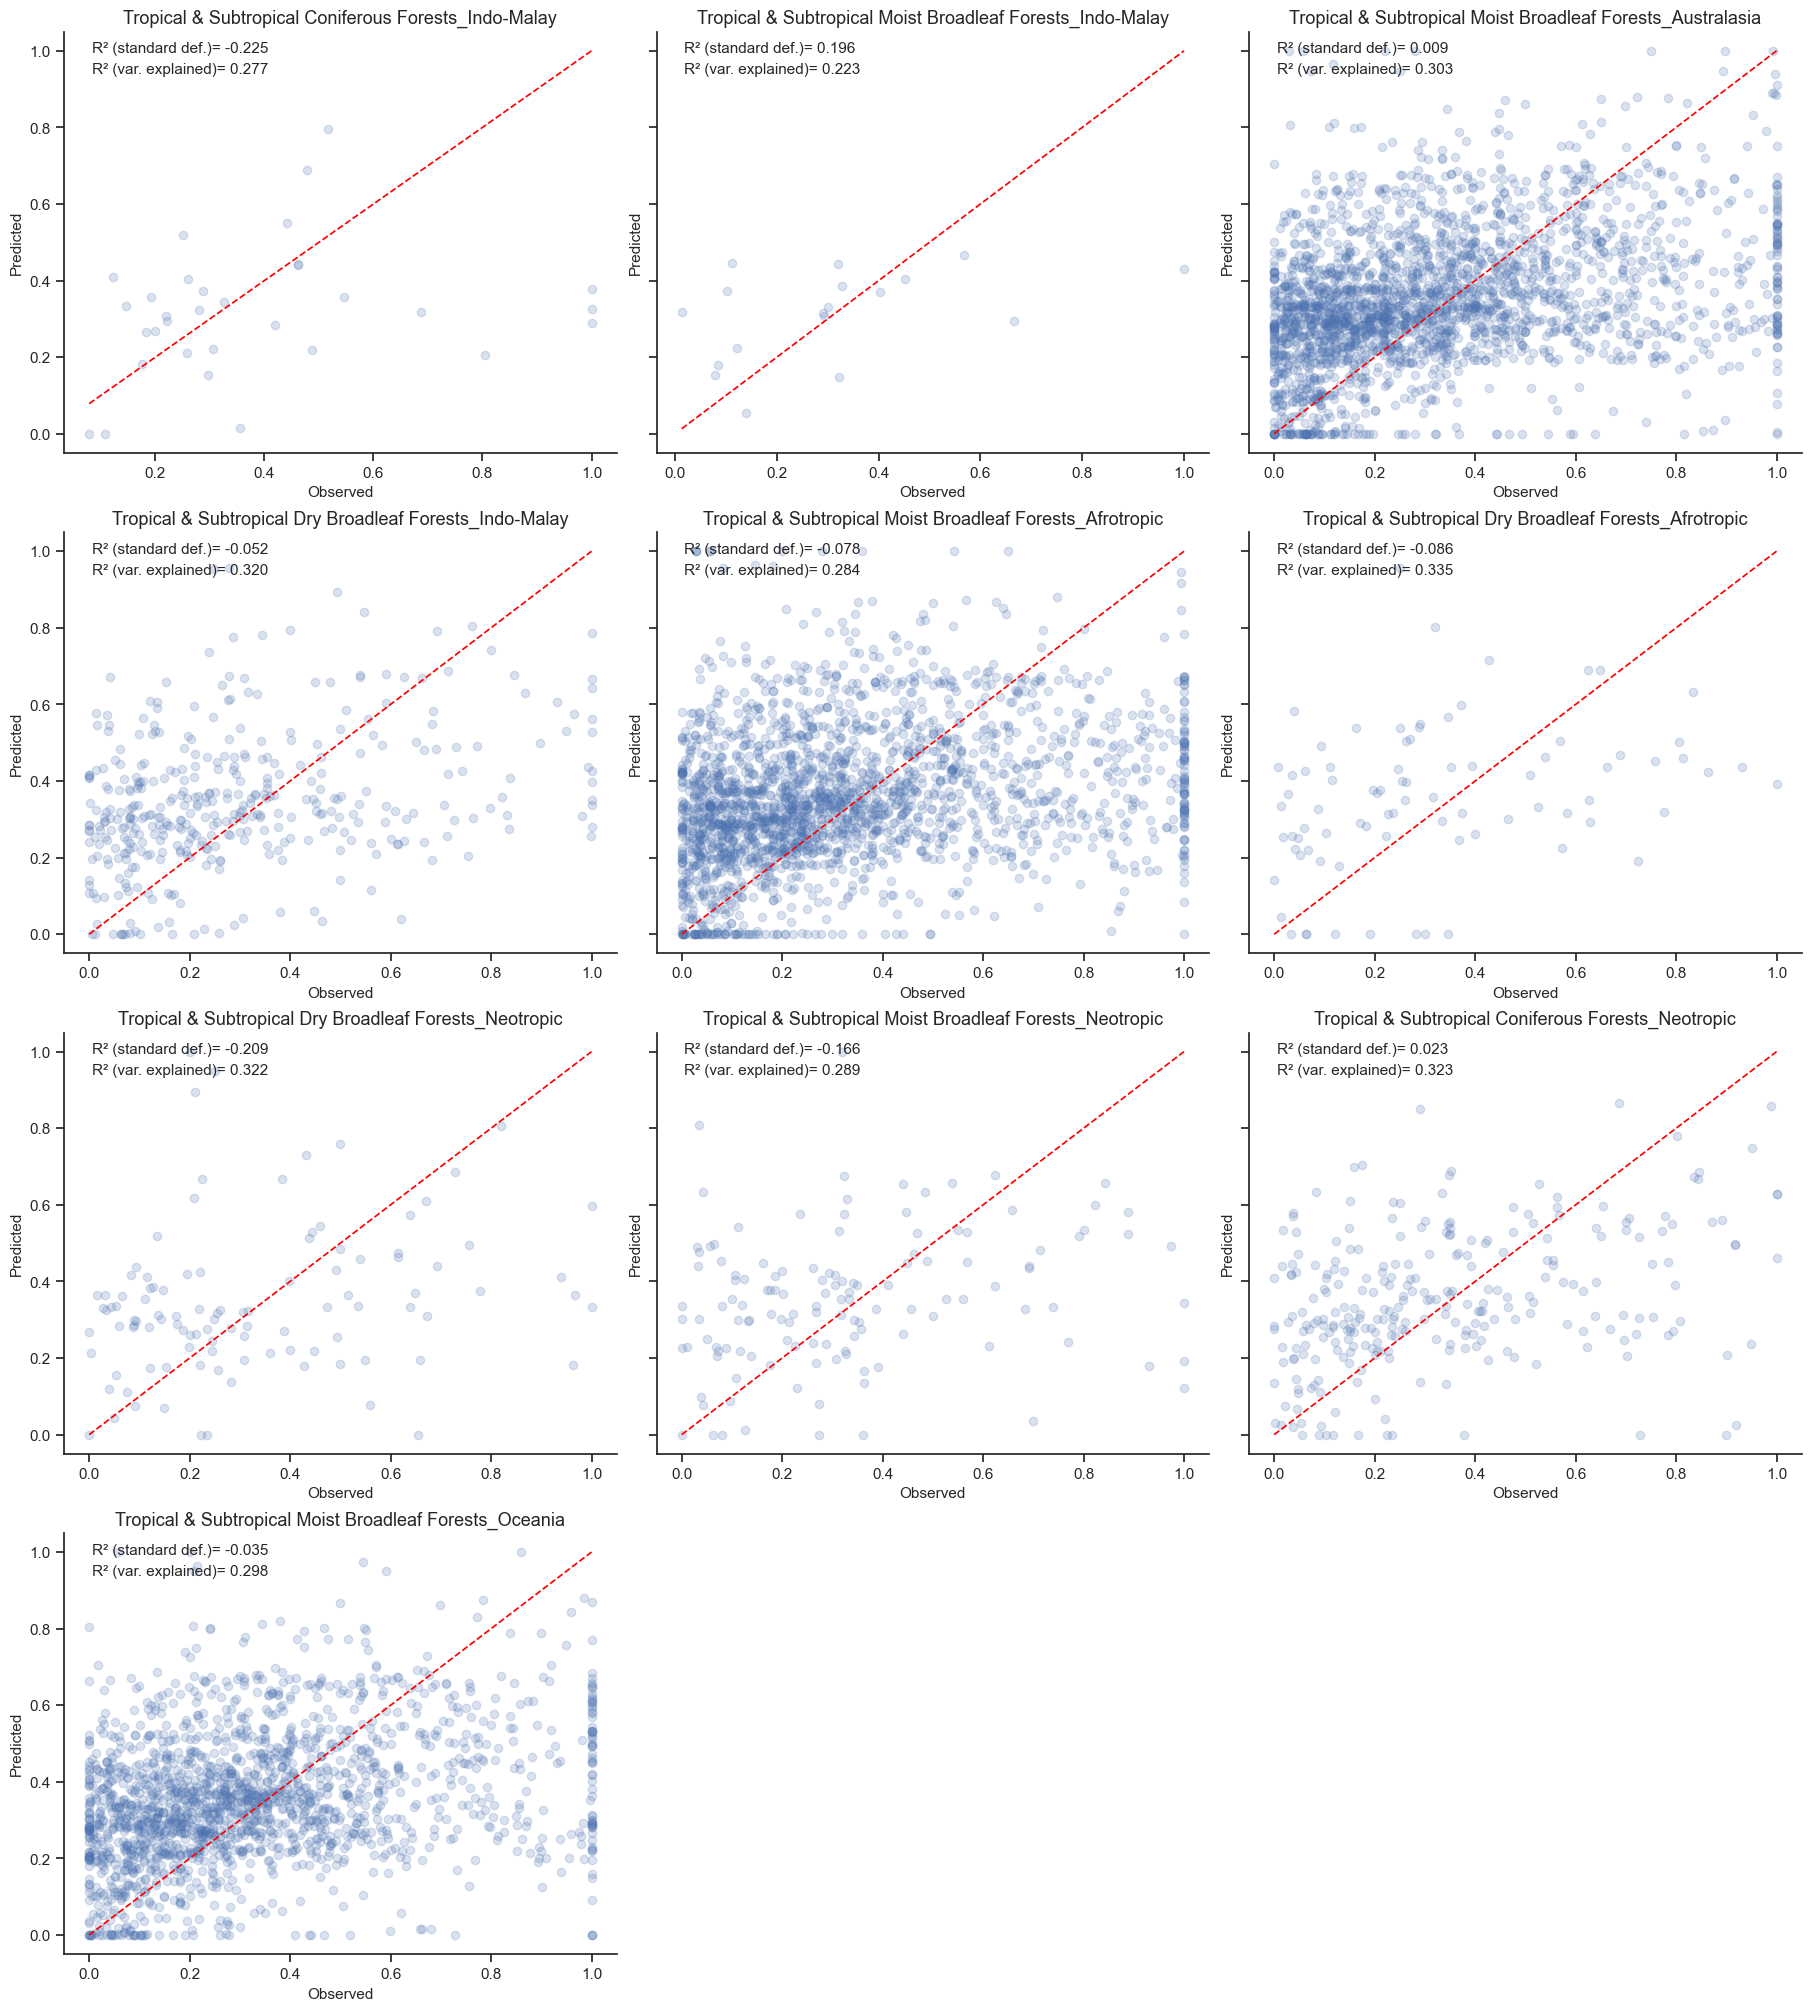

In [36]:
# Calibration plots by group
# Groups represent levels in the model hierarchy (from 1 up to 3)
plot_calibration_by_group(
    y_true=y_true_spatial_cv,
    y_pred=y_pred_spatial_cv,
    group_idx=level_2_idx_spatial_cv,
    group_mapping=level_2_mapping,
)

### Spatial CV: Approximation of change predictions

In [39]:
print_evaluation_metrics_crossval(metrics=change_metrics_spatial_cv)

Cross-validation performance metrics
Overall metrics
--------------------------------------------------------------------------------
  - R² (standard def.):
   Test:  mean: 0.138 | min: -0.027 | max: 0.371
   Train: mean: 0.321 | min: 0.277 | max: 0.411
  - R² (variance explained):
   Test:  mean: 0.315 | min: 0.121 | max: 0.560
   Train: mean: 0.264 | min: 0.204 | max: 0.339
  - Mean absolute error:
   Test:  mean: 0.166 | min: 0.160 | max: 0.189
   Train: mean: 0.136 | min: 0.131 | max: 0.141
  - Median absolute error:
   Test:  mean: 0.127 | min: 0.112 | max: 0.136
   Train: mean: 0.095 | min: 0.090 | max: 0.104
  - Pearson correlation:
   Test:  mean: 0.417 | min: 0.210 | max: 0.656
   Train: mean: 0.571 | min: 0.537 | max: 0.649
  - Spearman correlation:
   Test:  mean: 0.332 | min: 0.044 | max: 0.626
   Train: mean: 0.503 | min: 0.452 | max: 0.591
  - Bias ratio:
   Test:  mean: -15.716 | min: -41.982 | max: 0.367
   Train: mean: -0.104 | min: -1.648 | max: 1.255

Bottom quartil

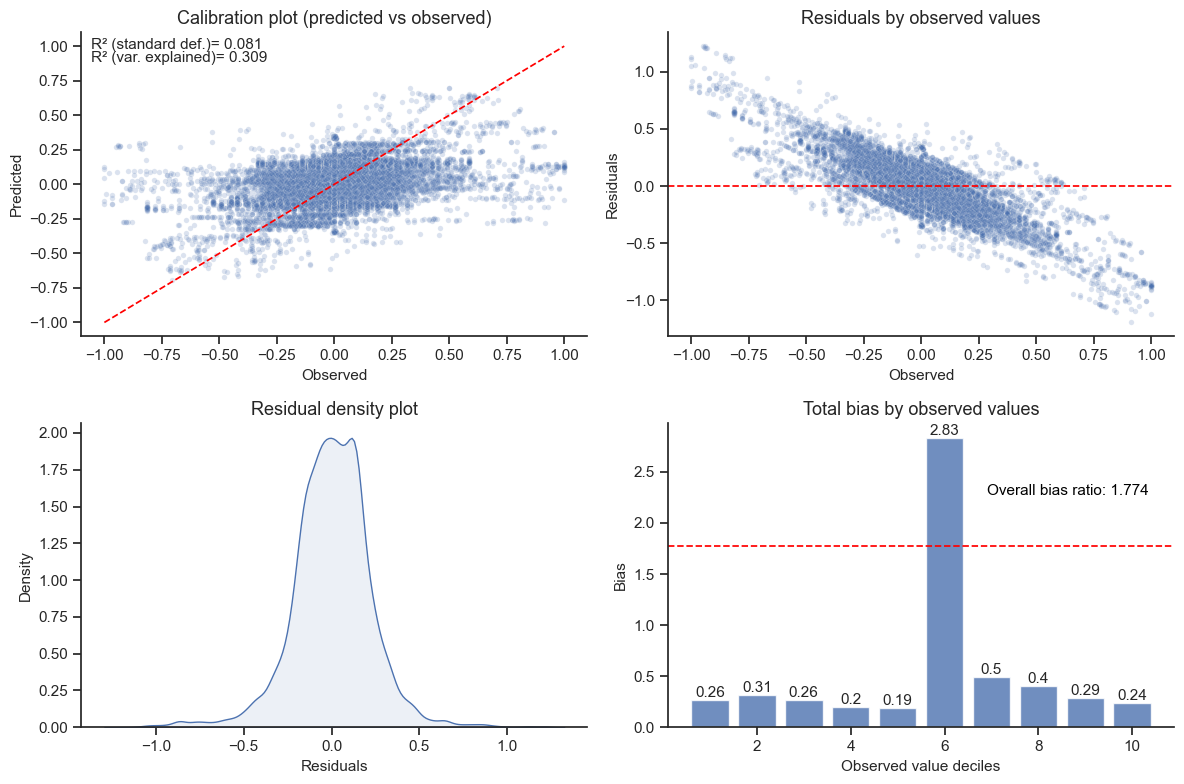

In [40]:
plot_calibration_and_residuals(
    y_true=y_true_change_spatial_cv,
    y_pred=y_pred_change_spatial_cv,
    y_residual=y_res_change_spatial_cv,
    metrics=change_metrics_all_spatial_cv,
)

## --- Environmental cross-validation evaluation ---

In [ ]:
# OLD: Runs from the thesis work
# 3000 tune iterations is standard

# BII covariates, sqrt: run_folder_2024-05-08_14.12
# BII covariates, untransformed: run_folder_2024-05-08_15.08
# BII covariates, logit: run_folder_2024-05-08_22.23

# Adding bioclimatic and topographic variables, sqrt: run_folder_2024-05-08_16.35
# Also adding more detailed LUI, sqrt: run_folder_2024-05-08_18.03
# Restricted LUI covariates, sqrt: run_folder_2024-05-09_15.00
# Detailed LUI 10,000 tune: run_folder_2024-05-20_21.36